#### Problem Statement
1. (a) Consider the average emperical loss for logistic regression
$$
J(\theta) = \frac{1}{m} \sum_{i=1}^m{\log(1 + e^{-y^{(i)}\theta^T x^i})} = \frac{-1}{m} \sum_{i=1}^m{\log(h_\theta(y^{(i)}x^{(i)})}
$$
Find the Hessian $H$ of the function and show that for any vector $z$ 
$$
z^THz \geq 0.
$$

#### Solution 

Lets start with the gradiant of $J$ 
Then take the second derivative. Due to nice properties of the behaviour of derivative of sigmoid we'll get the hesssian as $$H(i,j) = h_\theta(1-h_\theta)(y^{(i)})^2(x_ix_j)$$

Details :
$$
\frac{\partial}{\partial \theta_j} J(\theta)= -\frac{1}{m}.\sum_{i=1}^m (1-h_{\theta}(y^i x^i)).y^i.x_j^i
$$
$$
\begin{align*}
H_{j,k} &= \frac{1}{m}.\sum_{i=1}^m h_{\theta}(y^i x^i).(1-h_{\theta}(y^i x^i)).(y^i.x_j^i).(y^i.x_k^i)\\
&= \frac{1}{m}.\sum_{i=1}^m h_{\theta}(y^i x^i).(1-h_{\theta}(y^i x^i)).x_j^i.x_k^i
\end{align*}
$$

For an arbitrary vector $z, z^THz$ will translate to $\sum_i \sum_j z_i x_i x_j z_j$ which is equal to $(x^Tz)^2$ which is $ \geq 0 $ 

#### Insight

This condition is equivalent with the statement that H is semidefinite (written as $H \succeq 0$). Which means all of its eigenvalues are positive (Recall that H is a symmetric matrix so its eigenvalues are real by that property). Semi-definiteness of $H$ also implies that $J$ is convex and has no other local minima than the global one.

1. (b) Given a binary classification dataset, fit it to a logistic regression model using Newton's method. Initialize Newton's method with $\vec{\theta} = \vec{0}$. Also plot the results and desicion boundary

#### Solution
We'll follow the standard solution order
1. Load the data into pandas dataframe
2. Clean up and rectify the data
3. Define the architecture
4. Train the model 
5. Plot its results

In [30]:
%matplotlib inline
import numpy as np # imports a fast numerical programming library
import scipy as sp #imports stats functions, amongst other things
import matplotlib as mpl # this actually imports matplotlib
import matplotlib.cm as cm #allows us easy access to colormaps
import matplotlib.pyplot as plt #sets up plotting under plt
import pandas as pd #lets us handle data as dataframes

#sets up pandas table display
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)

import seaborn as sns #sets up styles and gives us more plotting options

In [31]:
df_x = pd.read_csv("./data/logistic_x.txt", sep="\ +", names=["x1", "x2"], header=None, engine='python')
df_y = pd.read_csv("./data/logistic_y.txt", sep="\ +", names=["y"], header=None, engine='python')
df_y = df_y.astype(int)
df_x.head()

,x1,x2
0,1.343250,-1.331148
1,1.820553,-0.634668
2,0.986321,-1.888576
3,1.944373,-1.635452
4,0.976734,-1.353315


In [32]:
x = np.hstack([np.ones((df_x.shape[0], 1)), df_x[["x1","x2"]].values]) #Horizontally stack the input while also adding a 1 coulmn
y = df_y["y"].values

In [33]:
def sigmoid(x):
    return (1/(1+np.exp(-x)))

def hessian(theta, x, y):
    hess = np.zeros((x.shape[1], x.shape[1]))                                    # Initialize a 0 n*n matrix 
    z = y*x.dot(theta)                                                          
    for i in range(hess.shape[0]):
        for j in range(hess.shape[0]):
            if i<= j:
                hess[i][j] = np.mean(sigmoid(z)*(1-sigmoid(z))*x[:,i]*x[:,j])    # Calculate one side of the diagonal only, remember to take into account 1/m by using np.mean()
                if i != j:
                    hess[j][i] = hess[i][j]                                      # Use symmetricity
    return hess

def gradiant(theta, x, y):
    z = y*x.dot(theta)
    g = -np.mean((1-sigmoid(z))*y*x.T, axis=1)
    return g

#### Newton's method

Newton's update rule for vectors is 
$$
\begin{align*}
\theta' := \theta - H^{-1} \nabla_\theta J(\theta)
\end{align*}
$$

In [34]:
def newton_update(theta0, x, y, eps):
    theta = theta0
    delta = 1
    while delta > eps:
        theta_prev = theta.copy()
        theta -= np.linalg.inv(hessian(theta, x, y)).dot(gradiant(theta, x, y))
        delta = np.linalg.norm(theta-theta_prev, ord=1)
    return theta

In [35]:
theta0 = np.zeros(x.shape[1])
theta_final = newton_update(theta0, x, y, 1e-6)
print(theta_final)

[-2.6205116   0.76037154  1.17194674]


In [36]:
df_x.insert(0, "y", df_y)
df_x["y"] = pd.to_numeric(df_x["y"],downcast='signed')
df_x.head()

,y,x1,x2
0,-1,1.343250,-1.331148
1,-1,1.820553,-0.634668
2,-1,0.986321,-1.888576
3,-1,1.944373,-1.635452
4,-1,0.976734,-1.353315


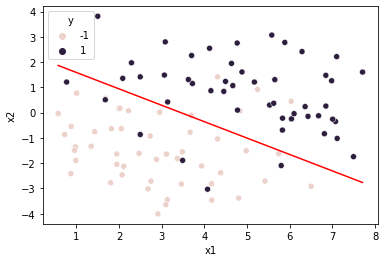

In [37]:
# Generate vector to plot decision boundary
x1_vec = np.linspace(df_x["x1"].min(),df_x["x1"].max(),2);

# Plot raw data
sns.scatterplot(x="x1", y="x2", hue="y", data=df_x);

# Plot decision boundary
plt.plot(x1_vec,(-x1_vec*theta_final[1]-theta_final[0])/theta_final[2], color="red");